# Tarea 1 – Muestreo de Variables Aleatorias
**Curso:** GF7013 – Métodos Inversos Avanzados  
**Grupo:** 2  
**Integrantes:** Alex Villarroel, Ignacio Brito, Ítalo Salazar, José de la Peña  
**Fecha de entrega:** 25 de abril de 2025

## Introducción

Esta tarea tiene como objetivo implementar y comparar métodos de generación de variables aleatorias de distribuciones conocidas. Se trabajan tres tipos de distribuciones:

- **Multinomial** (discreta),
- **Uniforme en N dimensiones** (continua),
- **Normal multivariada** (continua).

A través de métodos como el Análogo, Inverso y Relacional, se estudian la eficiencia, comportamiento y precisión de las muestras generadas, contrastando los resultados con métodos predefinidos (`numpy`) y lo implementado.

## P1 – Distribución Multinomial

### P1.0 – Descripción teórica

Una Variable Aleatoria Discreta Multinomial puede tomar uno de varios estados posibles, cada uno
con una cierta probabilidad asociada. Estas se pueden obtener normalizando los pesos de cada estado por el peso total.


### P1.1 – Implementación del método "análogo"

Para muestrear esta distribución se utiliza el Método Análogo, el cual consiste en generar una realización de una Distribución Uniforme $u$ $\in  ]0,1]$ y luego identificar en qué intervalo se encuentra en la suma acumulada de las probabilidades.

La modificación se realizó en el archivo `GF7013/probability_functions/pmf/pmf_multinomial.py`, dentro del método `_draw`, bajo la condición `if self.method == 'analog':`.

### Fragmento de código modificado – Método análogo (`pmf_multinomial.py`)

```python
elif self.method == 'analog':
            if Ns is None:
                # Realization of an ]0, 1] uniform distribution
                realization = self.rng.uniform(low = 0.0, high = 1.0, size = None)

                # Cumulative density function (CDF) of the multinomial distribution
                cdf = NP.cumsum(self.prob)

                # Find the index of the first value in the CDF that is greater than or equal to the realization
                i = NP.searchsorted(cdf, realization)

                # Return the corresponding value from self.values
                sample = self.values[i]
            else:
                # Use a single recursion to compute Ns samples.
                sample = NP.array([self._draw(Ns=None) for _ in range(Ns)])


A continuación, se presenta el muestreo considerando 10.000 muestras para la implementación del método, el muestreo de NumPy y la probabilidad teórica.

The probabilities for each discrete state are
Spurious with probability 0.08849557522123895
Guess with probability 0.26548672566371684
No Idea with probability 0.1946902654867257
True value? with probability 0.4424778761061947
invalid? with probability 0.008849557522123895
Total Probability is: 1.0


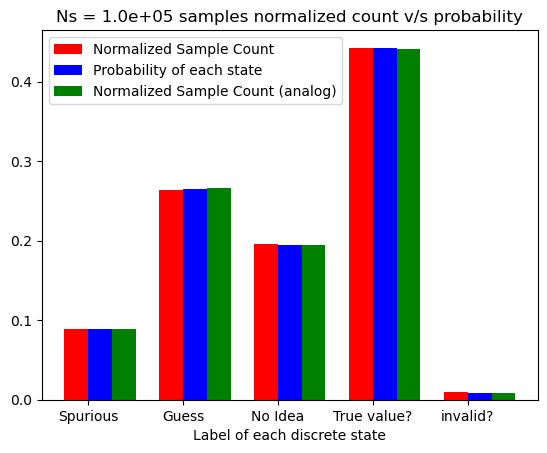

In [1]:
%run P1.py

### P1.2 – Comparación y análisis

Como se observa en el gráfico, la implementación logra muestrear adecuadamente la distribución. En algunos casos, el Método Análogo supera levemente la probabilidad teórica, como en el estado "Guess". A su vez, en otros casos es inferior, como en "True value?" o "invalid?". Sin embargo, estas diferencias son leves y, considerando un mayor número de muestras, probablemente serían poco apreciables.


## P2 – Distribución Uniforme en $N$ dimensiones

### P2.0 – Descripción teórica

#### Distribución uniforme en una dimensión

La función de densidad de probabilidad (fdp) de una variable continua $X \sim U(a, b)$ es:

$$\Large
f_X(x) = 
\begin{cases}
\frac{1}{b - a}, & \text{si } x \in ]a, b] \\
0, & \text{en otro caso}
\end{cases}
$$

Siendo $\large\frac{1}{(b - a)}$ la constante de normalización.

#### Distribución uniforme en $\mathbb{R}^n$

Para un vector aleatorio $X = (X_1, X_2, \dots, X_n)$, donde cada $X_i \sim U(a_i, b_i)$ (independientes), la función de densidad conjunta es:

$$\large
f_X(\underbar{x}) = f_X(x_{1}, x_{2}, x_{3}, \ldots, x_{n}) = f_{X_{1}}(x_{1}) \cdot f_{X_{2}}(x_{2}) \cdot f_{X_{3}}(x_{3}) \ldots f_{X_{n}}(x_{n})
\\
$$
Por lo tanto:
$$\Large
f_X(\underbar{x}) =
\begin{cases}
\frac{1}{\prod_{i=1}^n (b_i - a_i)}, & \text{si } x_i \in ]a_i, b_i] \ \forall i \\
0, & \text{en otro caso}
\end{cases}
$$

Siendo $\large\frac{1}{\prod_{i=1}^n (b_i - a_i)}$ la constante de normalización.

### P2.1 – Implementación del método inverso

Para muestrear esta distribución se utiliza el Método Inverso, el cual consiste en generar una realización de una Distribución Uniforme $u$ $\in  ]0,1]$ y luego evaluarla en la función inversa de la función de desisidad de probabilidad acumulada ${F_{X}(\underbar{x})}^{-1}$. Como se tiene que las variables aleatorias $X_{i}$ son idependientes, se aplica el método a cada una de ellas a partir de las siguientes expresiones:
$$\large
u_{i} = F_{X_{i}}(x_i)
$$
Para una distribución uniforme en una dimensión:
$$\large
F_{X_{i}}(x_i) = \frac{x_{i} - a_{i}}{b_{i} - a_{i}}
$$
Por lo tanto:
$$\large
x_{i} = a_{i} + u_{i} \cdot (b_{i} - a_{i})
$$
Siendo $x_{i}$ una muestra de $f_{X_{i}}$.

La distribución uniforme en $n$ dimensiones fue implementada en el archivo `GF7013/probability_functions/pdf/pdf_uniform_nD.py`, dentro del método `_draw`.

### Fragmento de código modificado – Método Inverso (`pdf_uniform_n.py`)

```python
if Ns is None:
    # Initialize sample vector
    sample = np.zeros(self.N)
    
    # Limits and normalization constant
    ll = self.ll
    ul = self.ul

    # Realization of an ]0, 1] uniform distribution
    realization = self.rng.uniform(low = 0.0, high = 1.0, size = self.N)

    # Obtaining the sample through the inverse method
    sample = ll + (realization * (ul - ll))
    
else:
    sample_matrix = np.zeros((self.N, int(Ns)))
    for i in range(int(Ns)):
        sample_matrix[:, i] = self._draw(None)

    sample = sample_matrix

return sample

A continuación, se presenta un histograma conjunto considerando 100.000 muestras para la implementación del método, así como histogramas de las distribuciones marginales considrando lo siguiente:
$$\large
\underbar{X} \sim U(]-2,5] \text{x} ]3.2,7])
$$

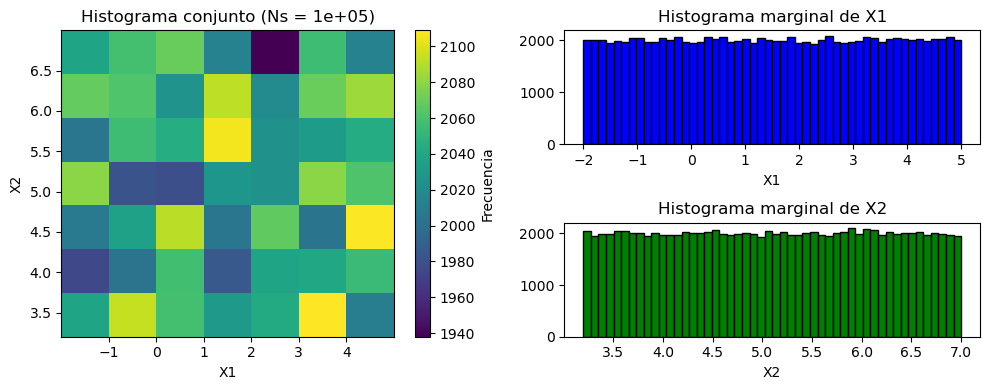

In [2]:
%run P2.py

### P2.3 – Análisis gráfico

De gráfico se observa que, si bien se logra muestrear gran parte del espacio mediante el número de muestras, no se logra apreciar la cierta suavidad conocida de una distribución uniforme, vale decir, aquel carácter constante en el espacio.


Junto con lo anterior, se repite el proceso para dos tamaños diferentes: $10^4$ y $10^6$.


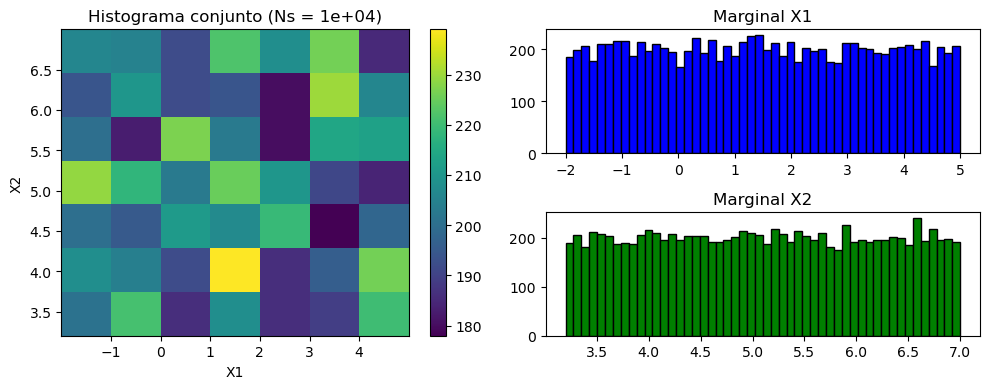

In [3]:
from GF7013.probability_functions import pdf
import numpy as np
import matplotlib.pyplot as plt

# Crear la distribución uniforme 2D
lower_lim = np.array([-2.0, 3.2])
upper_lim = np.array([5.0, 7.0])
par = {'lower_lim': lower_lim, 'upper_lim': upper_lim}
uni = pdf.pdf_uniform_nD(par)

# Generar muestras
Ns = int(1e4)
samples = uni.draw(Ns)

# Histograma conjunto y marginales
fig = plt.figure(figsize=(10, 4))

# Conjunto
ax1 = fig.add_subplot(1, 2, 1)
h = ax1.hist2d(samples[0], samples[1], bins=7, cmap='viridis')
ax1.set_title(f'Histograma conjunto (Ns = {Ns:.0e})')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
plt.colorbar(h[3], ax=ax1)

# Marginales
ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(samples[0], bins=50, color='blue', edgecolor='black')
ax2.set_title('Marginal X1')

ax3 = fig.add_subplot(2, 2, 4)
ax3.hist(samples[1], bins=50, color='green', edgecolor='black')
ax3.set_title('Marginal X2')

plt.tight_layout()
plt.show()

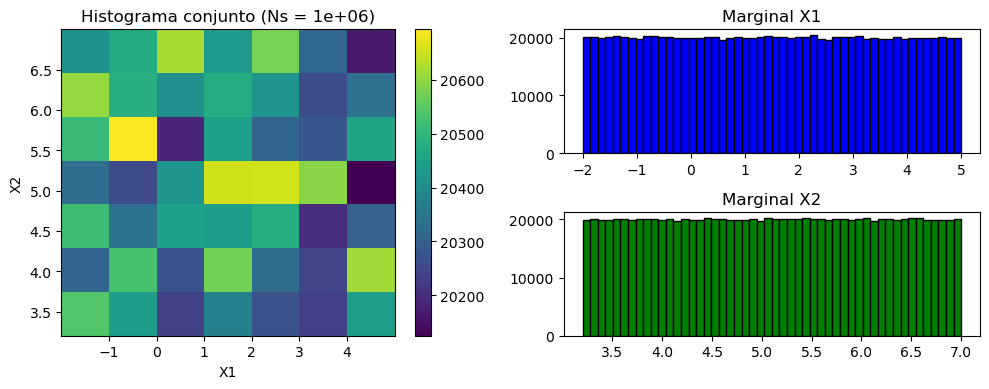

In [4]:
Ns = int(1e6)
samples = uni.draw(Ns)

fig = plt.figure(figsize=(10, 4))

# Conjunto
ax1 = fig.add_subplot(1, 2, 1)
h = ax1.hist2d(samples[0], samples[1], bins=7, cmap='viridis')
ax1.set_title(f'Histograma conjunto (Ns = {Ns:.0e})')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
plt.colorbar(h[3], ax=ax1)

# Marginales
ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(samples[0], bins=50, color='blue', edgecolor='black')
ax2.set_title('Marginal X1')

ax3 = fig.add_subplot(2, 2, 4)
ax3.hist(samples[1], bins=50, color='green', edgecolor='black')
ax3.set_title('Marginal X2')

plt.tight_layout()
plt.show()

### Comentarios
Los resultados respaldan el concepto de que a medida que aumenta el número muestras, tanto el histograma 2D así como las marginales, se vuelven más uniformes visualmente. Este aumento en la precisión de los marginales posee un costo computacional asociado, lo cual en ciertos casos llega a condicionar el problema que se intenta realizar, aunque particularmente para desarrollo de variables de este orden de magnitud, no resulta en un costo significativamente alto.

Asociando el método inverso a este problema, este lo realiza satisfactoriamente debido a la naturaleza en cuestión de la distribución. Sin embargo existen distribuciones en las que no necesariamente es posible obtener una forma analítica de la fdpa, lo que complejiza el uso del método.

### P3.0 – Teoría de la distribución normal univariada y multivariada

#### Distribución normal univariada

Una variable aleatoria $X \in \mathbb{R}$ sigue una distribución normal univariada si:

$$
X \sim \mathcal{N}(\mu, \sigma^2)
$$

donde:
- $\mu \in \mathbb{R}$ es la **media**,
- $\sigma^2 > 0$ es la **varianza**.

La función de densidad de probabilidad (pdf) en 1D se define como:

$$
f_X(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2 \right)
$$

Esta función es simétrica respecto a $\mu$, su valor máximo ocurre en $x = \mu$, y su anchura está determinada por $\sigma$. La constante de normalización $\large\frac{1}{\sqrt{2\pi \sigma^2}}$ asegura que la integral de la pdf sobre todo el dominio sea igual a 1.

---

#### Distribución normal multivariada

Una variable aleatoria $X \in \mathbb{R}^n$ sigue una distribución normal multivariada si:

$$
X \sim \mathcal{N}(\mu, C)
$$

donde:
- $\mu \in \mathbb{R}^n$ es el **vector de medias**,
- $C \in \mathbb{R}^{n \times n}$ es la **matriz de covarianza** (simétrica y definida positiva).

La función de densidad de probabilidad (pdf) multivariada se expresa como:

$$
f_X(x) = \frac{1}{\sqrt{(2\pi)^n \det(C)}} \exp\left( -\frac{1}{2}(x - \mu)^\top C^{-1} (x - \mu) \right)
$$

Esta expresión generaliza la pdf normal al espacio $\mathbb{R}^n$.  La constante de normalización en este caso está dada por: $\large\frac{1}{\sqrt{(2\pi)^n \det(C)}}$. La matriz de covarianza $C$ describe tanto las **varianzas individuales** (en la diagonal) como las **covarianzas** entre pares de variables (en los elementos fuera de la diagonal). Si $C$ es diagonal, las variables son independientes.

Las **marginales** de esta distribución son normales univariadas, y si $C$ tiene elementos no nulos fuera de la diagonal, existe **correlación** entre las variables. Esto último se debe al hecho de que las marginales no implican que las variables sean independientes, ya que no necesariamente cumplen con que  

$$
C_{ij} =0 \text{    , para } i \neq j
$$.

La implementación de esta distribución se realizó en `GF7013/probability_functions/pdf/pdf_normal.py`, donde básicamente asignamos como argumento a la función los parámetros necesarios, es decir el vector de medias y la matriz de covarianzas dentro de un diccionario, además de el número de muestras a generar(parámetro opcional, en caso de que se requiera más de una dimensión). Como mencionaremos a continuación, se calcula la factorización de la matriz de covarianza (la descomposición de Cholesky) para poder generar muestras mediante el uso del método relacional.

### P3.1 – Implementación Método relacional

Para muestrear esta distribución se utiliza el Método Relacional, el cual consiste en generar muestras de otra distribución conocida y relacionarla a partir de una relación funcional. En este caso se asume que se sabe muestrear una distribución normal estándar $Z$ en $n$ dimensiones. Así $X$ y $Z$ se relacionan de la siguiente forma:

$$
X = \mu + W \cdot Z, \quad Z \sim \mathcal{N}(0, I), \quad W \cdot W^\top = C
$$

Donde $W$ es la **descomposición de Cholesky** de la matriz de covarianza $C$, la cual sirve particularmente dado que la matriz de covarianza es simétrica en este caso de distribución normal (ya que $C^T=C$).

La modificación principal se realizó en el método `_draw(self, Ns)` del archivo `pdf_normal.py`. A continuación se muestra el código modificado:

```python
if Ns is None:
    # Realization of a standard normal distribution
    u = self.rng.standard_normal(size=self.N)

    # Using functional relational form
    sample = self.mu + self.right_chol_cov @ u
else:
    # Initialize the sample array
    sample = np.zeros((int(self.N), int(Ns)))

    # Generate samples
    for i in range(int(Ns)):
        # Generate a standard normal random variable
        u = self.rng.standard_normal(self.N)

        # Using functional relational form
        sample[:, i] = self.mu + np.dot(self.right_chol_cov, u)
return sample

También se implementó el cálculo de la constante de normalización en el constructor `__init__`:

```python
self.log_normalization = -0.5 * (self.N * np.log(2 * np.pi) + logdetCov)
self.normalization = np.exp(self.log_normalization)

Y se modificaron las funciones `_log_likelihood` y `_likelihood`.

```python

def _log_likelihood(self, x):
    x = self.__check_x(x)
    misfit = x - self.mu
    return -0.5 * np.dot(misfit.T, np.dot(self.inv_cov, misfit))

def _likelihood(self, x):
    LogLike = self._log_likelihood(x)
    return np.exp(LogLike)

Finalmente, se agregó una función de verificación `test_draw_samples()` que compara la media y covarianza empírica con los valores teóricos definidos:

```python
def test_draw_samples(self, samples, tol_mu=0.05, tol_cov=0.1, verbose=True):
        """
        Evalúa el rendimiento de la función de muestreo, en base a 
        ciertas tolerancias para la media y la covarianza.
        samples: array de muestras, donde cada columna es una muestra
        tol_mu: tolerancia para la media
        tol_cov: tolerancia para la covarianza
        verbose: si True, imprime los resultados de la evaluación
        """

        # Se calcula la media y covarianza empírica de las muestras
        sample_mean = np.mean(samples, axis=1)
        sample_cov = np.cov(samples, rowvar=1)

        # Se calcula la diferencia entre la media y covarianza empírica y la teórica
        mean_diff = np.abs(sample_mean - self.mu)
        cov_diff = np.abs(sample_cov - self.cov)

        # Checkea si todas componentes de la media y covarianza están dentro de las tolerancias
        if np.all(mean_diff < tol_mu) and np.all(cov_diff < tol_cov):
            if verbose:
                print("Se paso el test de muestreo.")
                print(f"Diferencia de media: {mean_diff}")
                print(f"Diferencia de covarianza:\n{cov_diff}")
            return True
        else:
            if verbose:
                print("No se paso el test de muestreo.")
                print(f"Diferencia de media: {mean_diff}")
                print(f"Diferencia de covarianza:\n{cov_diff}")
            return False


### P3.2 – Histograma conjunto (visualización bidimensional)

El siguiente histograma conjunto muestra cómo distribuyen las muestras de $X = [X_1, X_2]^\top$ generadas a partir de la distribución normal multivariada con:

- Media: $\large\mu = [0.5,\ 3.0]$
- Covarianza: $C = \begin{bmatrix} 2 & 1 \\ 1 & 4 \end{bmatrix}$

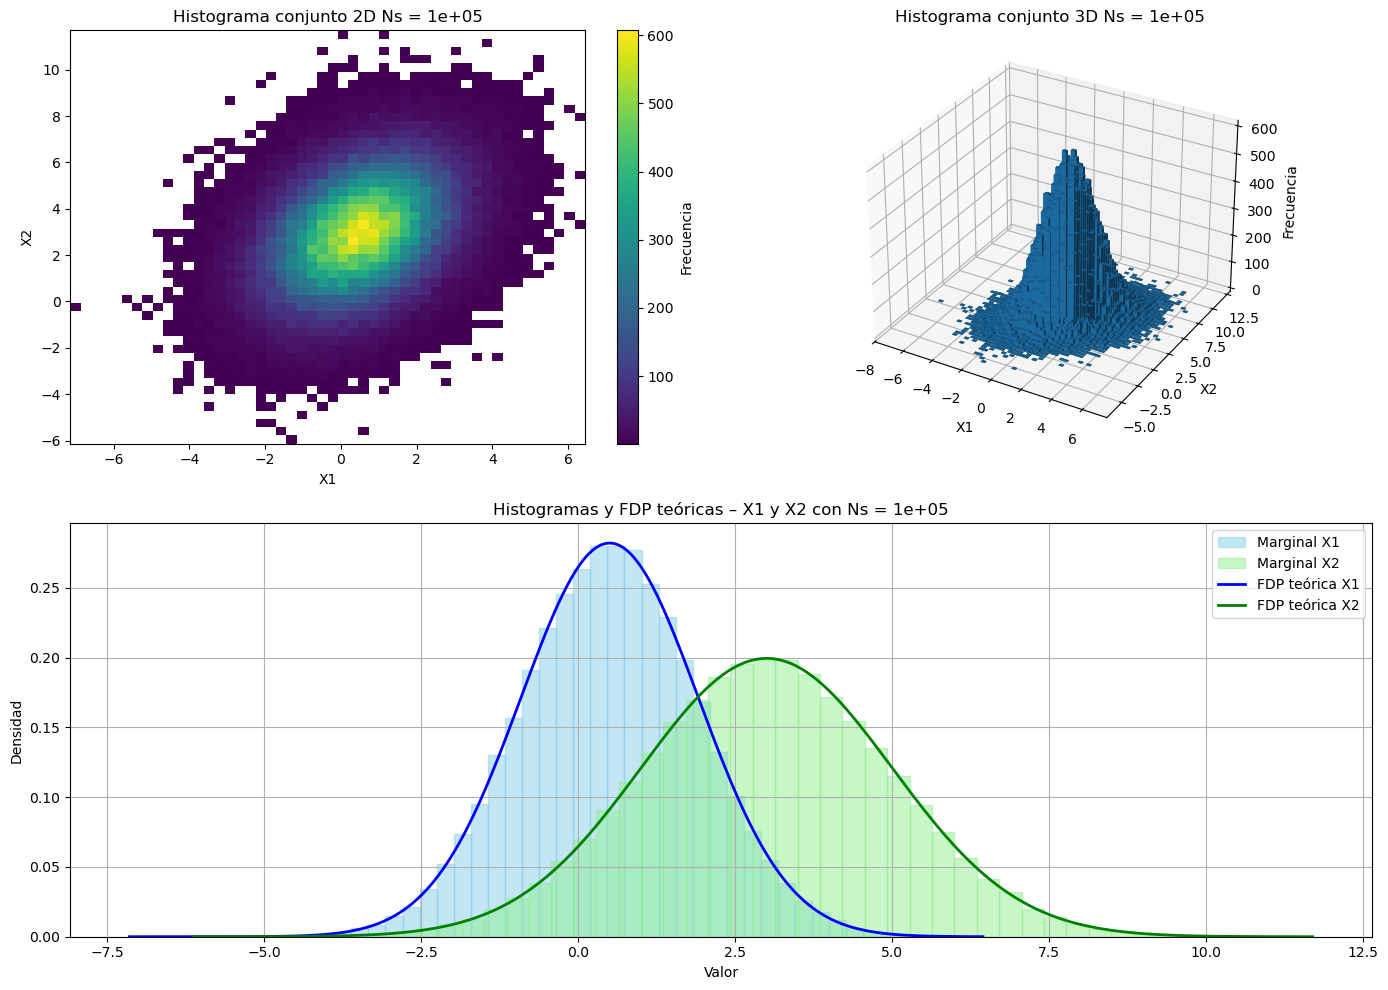

Se pasó el test de muestreo.
Diferencia de media: [0.00188119 0.00891914]
Diferencia de covarianza:
[[0.00335018 0.00386861]
 [0.00386861 0.01213695]]


In [5]:
%run P3.py

### Comentarios
La forma elíptica de la nube de puntos es coherente con lo que se espera de una normal multivariada. La orientación diagonal de la elipse refleja la correlación positiva entre las variables $X_1$ y $X_2$ (término $C_{12} = 1$).

Además, el centro de la nube está desplazado respecto al origen, ubicado alrededor del vector media $\mu$, como nos dice la teoría.

Se repite el mismo proceso para $1e4$ y $1e6$ muestras.

### P3.3 – Comparación Con 1E4 muestras y 1E6 muestras


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.gridspec import GridSpec
import pandas as pd

def get_figure_results_normal(df,mu,cov,bins=50):
    """
    Función para graficar histogramas y distribuciones de probabilidad
    de muestras generadas a partir de una distribución normal 2D.
    Args:
        df (pd.DataFrame): DataFrame que contiene las muestras generadas.
        mu (array): Media de la distribución.
        cov (array): Matriz de covarianza.
    """
    if df.shape[1] != 2:
        raise ValueError("El DataFrame debe contener exactamente dos columnas.")
    
    # Crear figura con GridSpec para controlar el layout
    fig = plt.figure(figsize=(14, 10))
    gs = GridSpec(2, 2, figure=fig)

    # ---------- Histograma conjunto 2D ----------
    ax1 = fig.add_subplot(gs[0, 0])
    x = df['X1']
    y = df['X2']
    Ns = len(x)

    h2d = ax1.hist2d(x, y, bins=bins, cmap='viridis',cmin=1)
    fig.colorbar(h2d[3], ax=ax1, label='Frecuencia')
    ax1.set_title(f'Histograma conjunto 2D Ns = {Ns:.0e}')
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')

    # ---------- Histograma conjunto 3D ----------
    ax2 = fig.add_subplot(gs[0, 1], projection='3d')
    hist, xedges, yedges = np.histogram2d(x, y, bins=bins)

    xpos, ypos = np.meshgrid(xedges[:-1] + np.diff(xedges)/2,
                             yedges[:-1] + np.diff(yedges)/2, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = np.zeros_like(xpos)
    dz = hist.ravel()

    mask = dz > 0
    xpos = xpos[mask]
    ypos = ypos[mask]
    zpos = zpos[mask]
    dz = dz[mask]
    dx = dy = (xedges[1] - xedges[0]) * np.ones_like(dz)

    ax2.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', cmap='viridis')
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    ax2.set_zlabel('Frecuencia')
    ax2.set_title(f'Histograma conjunto 3D Ns = {Ns:.0e}')

    # ---------- Histogramas marginales ----------
    ax3 = fig.add_subplot(gs[1, :])  # Ocupa toda la fila inferior

    # Histograma X1
    ax3.hist(df['X1'], bins=50, density=True, color='skyblue', alpha=0.5,
            label='Marginal X1', edgecolor='skyblue', linewidth=1)

    # Histograma X2
    ax3.hist(df['X2'], bins=50, density=True, color='lightgreen', alpha=0.5,
            label='Marginal X2', edgecolor='lightgreen', linewidth=1)

    # FDP teóricas
    x1_line = np.linspace(df['X1'].min(), df['X1'].max(), 200)
    y1_line = norm.pdf(x1_line, loc=mu[0], scale=np.sqrt(cov[0, 0]))
    ax3.plot(x1_line, y1_line, color='blue', lw=2, label='FDP teórica X1')

    x2_line = np.linspace(df['X2'].min(), df['X2'].max(), 200)
    y2_line = norm.pdf(x2_line, loc=mu[1], scale=np.sqrt(cov[1, 1]))
    ax3.plot(x2_line, y2_line, color='green', lw=2, label='FDP teórica X2')

    ax3.set_title(f'Histogramas y FDP teóricas – X1 y X2 con Ns = {Ns:.0e}')
    ax3.set_xlabel('Valor')
    ax3.set_ylabel('Densidad')
    ax3.legend()
    ax3.grid(True)

    plt.tight_layout()
    plt.show()


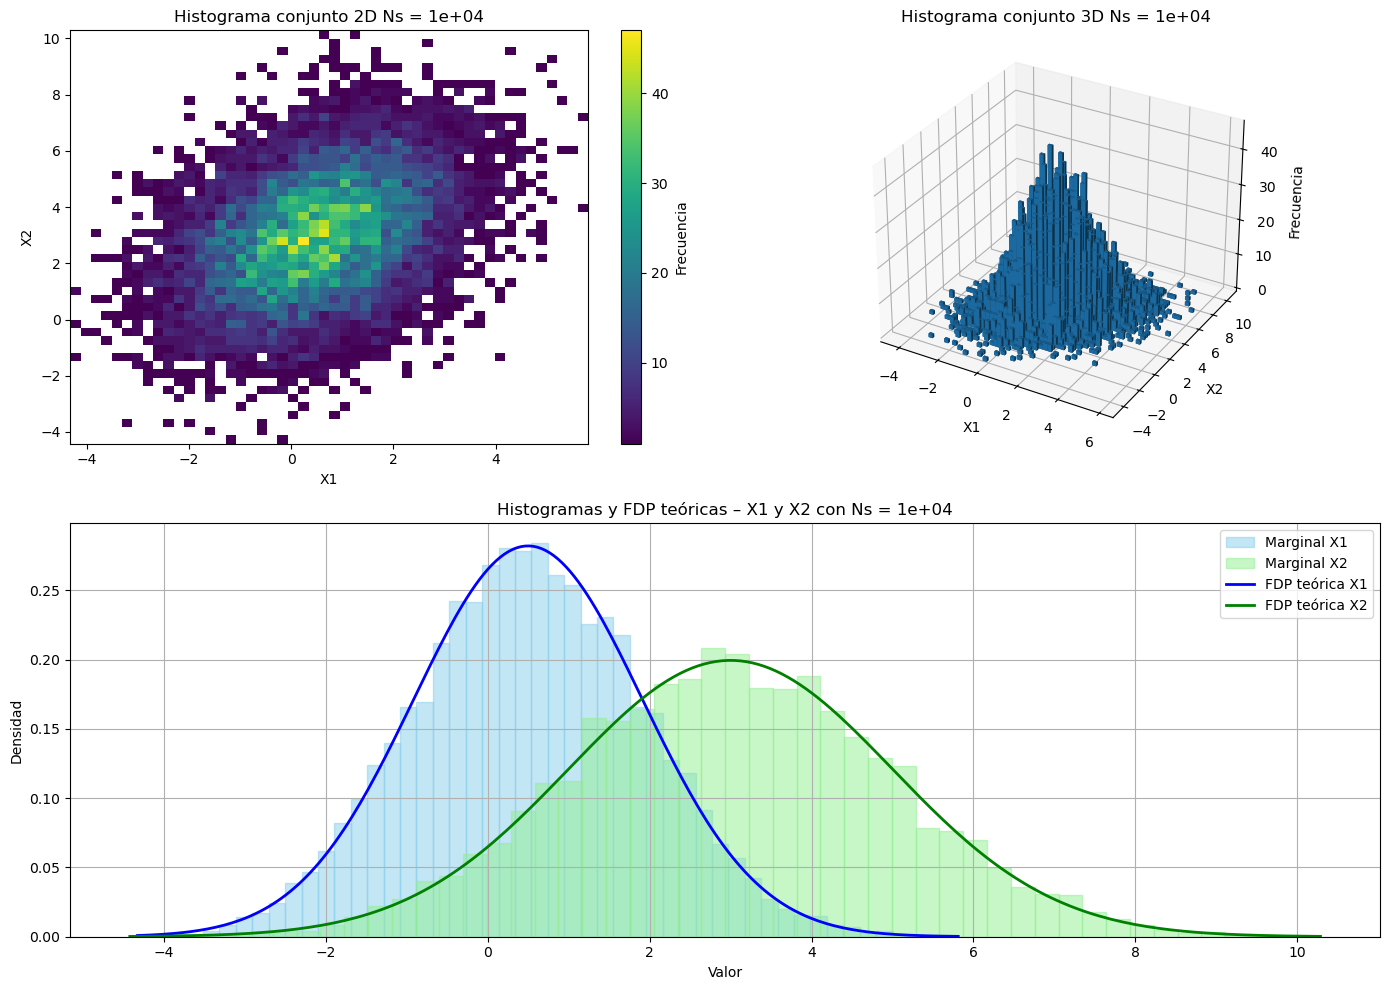

Se pasó el test de muestreo.
Diferencia de media: [0.00686853 0.00129536]
Diferencia de covarianza:
[[0.02030231 0.04238372]
 [0.04238372 0.04198711]]


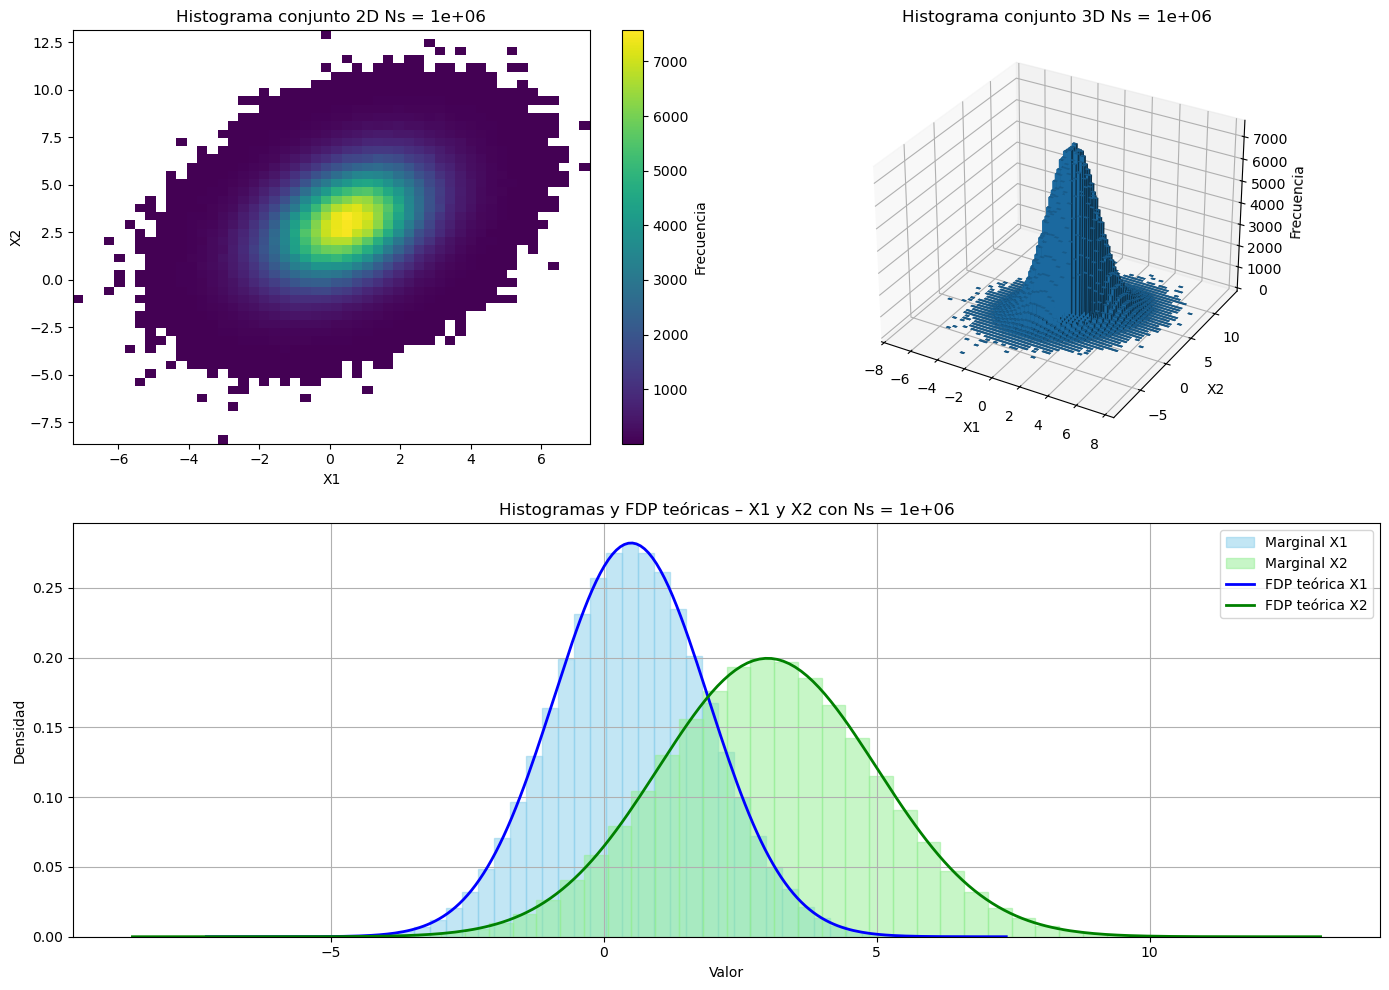

Se pasó el test de muestreo.
Diferencia de media: [0.00097477 0.00171074]
Diferencia de covarianza:
[[0.00678748 0.00856782]
 [0.00856782 0.01263374]]


In [7]:
# Definir parámetros y crear instancia
for i,Ns, in enumerate([1e4, 1e6]):
    par = {
        'mu': np.array([0.5, 3.0]),
        'cov': np.array([[2, 1], [1, 4]])
    }
    normal = pdf.pdf_normal(par)
    # Generar muestras
    mu = normal.mu
    cov = normal.cov
    Ns = int(Ns)
    samples = normal.draw(Ns)
    # Convertir a DataFrame
    df = pd.DataFrame(samples.T, columns=['X1', 'X2'])
    # Obtener resultados
    get_figure_results_normal(df, mu, cov)
    normal.test_draw_samples(samples)

### Comentarios
A partir del análisis de los resultados, al igual que en P2.3, una vez más se pone a prueba la Ley de los Grandes Números y la convergencia a la distribución teórica a medida que aumentamos el número de muestras, lo cual evidentemente posee un costo computacional mayor.

En el caso en cuestión, se logra visualizar notoriamente que al ocupar un millón de muestras la distribución se asimila visualmente de mejor manera que la distribución sigue una distribución normal multivariada. Mientras que con diez mil muestras existen mayores diferencias con la fdp teórica, lo que se aprecia también en las frecuencias de cada barra en los histogramas 2d. En cuanto al análisis de los marginales en conjunto con el histograma 2d, se puede apreciar cómo es que el hecho de que las distribuciones posean distinta media y desviación estándar, hacen que el histograma siga la forma de una elipsoide, teniendo mejores resultados de precisión con mayores muestras dado que hay una menor diferencia entre los marginales y las fdp teóricas.

### P3.4 – Verificación estadística de media y covarianza empírica

Se utilizó la función `test_draw_samples()` implementada en `pdf_normal.py` para evaluar si las muestras aleatorias generadas mediante el método relacional permiten **recuperar estadísticamente** los parámetros de la distribución normal multivariada original:

1. Una media empírica que converge hacia la media teórica $\mu$,
2. Una matriz de covarianza empírica que converge hacia la matriz teórica $C$.

El objetivo de esta verificación es validar que el método de muestreo utilizado genera realizaciones consistentes con la distribución normal multivariada deseada. Esto se evalúa mediante el cálculo del error absoluto entre los valores empíricos y los teóricos, comparándolos contra tolerancias predefinidas.

#### Tolerancias utilizadas

- $\text{tol}_\mu = 0.05$: tolerancia para el error absoluto en la media.
- $\text{tol}_\text{cov} = 0.1$: tolerancia para el error absoluto en la covarianza.

Estas tolerancias fueron seleccionadas como umbrales razonables para permitir pequeñas fluctuaciones estadísticas debido a la naturaleza aleatoria del muestreo. No se espera que los valores empíricos coincidan exactamente con los teóricos, sino que estén dentro de un margen aceptable que refleje convergencia.

A medida que aumenta el número de muestras, se espera que estos errores disminuyan y los resultados empíricos se acerquen aún más a los valores teóricos, dentro de estas tolerancias establecidas.


#### Resultados para $N = 10^4$:
- La media y la covarianza empíricas presentan mayores errores absolutos, debido al tamaño reducido del muestreo.
- Aun así, los errores se mantienen dentro de un rango razonable en muchos casos.
- El test puede fallar si se fija una tolerancia muy estricta, lo cual es esperable en muestras pequeñas.

#### Resultados para $N = 10^6$:
- La media y la covarianza empíricas muestran una alta concordancia con los valores teóricos.
- El test estadístico **se supera exitosamente**, cumpliendo las tolerancias establecidas ($\text{tol}_\mu = 0.05$, $\text{tol}_\text{cov} = 0.1$).
- Esto confirma que el método de muestreo relacional implementado genera muestras consistentes con la distribución normal multivariada deseada, incluso en escalas grandes.

#### Conclusiones
- En este caso, los métodos utilizados logran de manera exitosa reproducir estadísticamente las distribuciones teóricas. Por esto mismo, para ambos valores de N se pasaron los test.
- Para distribuciones más complejas, puede ser complicado llegar a estos resultados, por lo que dependiendo del problema las tolerancias seleccionadas deberán variar.
- En un contexto más práctico, conocer los parámetros físicos con los que se está trabajando también puede ser información importante a la hora de proponer una tolerancia.

